#### Created by Martin Straußberger

## Import Depenedencies

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Get the Data

In [0]:
df = pd.read_csv("creditcard.csv", header= 0)

## EDA
exploratory data analysis

In [0]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Checking for NaN values:

In [0]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### There are no NaN values, so we don´t have to clean the data

## Check the class distribution:

In [0]:
classes = pd.value_counts(df["Class"], sort=True).sort_index()
print(classes)

0    284315
1       492
Name: Class, dtype: int64


--------------------------

## Displaying the unbalance between Fraud & Non_Fraud:

In [0]:
import matplotlib.pyplot as plt

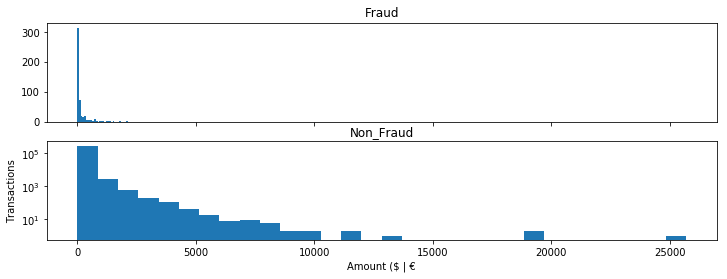

In [0]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')


ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Non_Fraud')

plt.xlabel('Amount ($ | €')
plt.ylabel('Transactions')
plt.yscale('log')
plt.show()

---------------------------

## Import seaborn for displaying the Histogram:

In [0]:
import seaborn as sns
import matplotlib.gridspec as gridspec

In [0]:
# Describe the Figure Size of the Histogram:
v_features = df.iloc[:,1:29].columns

In [0]:
# There is a Version Error with site-packages/matplotlib/axes -> In this case I will ignore only the 
# specific warning with the following function:
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

warnings.filterwarnings("ignore")

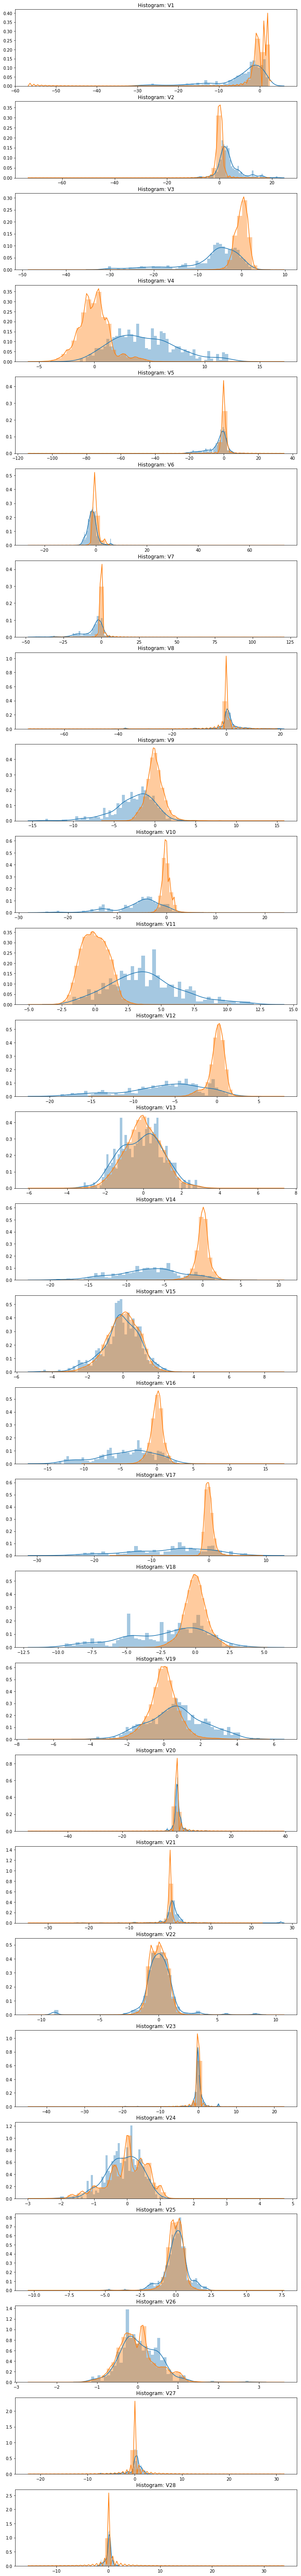

In [0]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('Histogram: ' + str(cn))
plt.show()


In [0]:
# Drop all of the features that have very similar distributions between the two types of transactions.
# (selected by observing)
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)


#### After analyzing and dropping those histograms with similiar distributions, resample the data.

---------------------------------------------

## Resampling:

In [0]:
# Distribution before Undersampling:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [0]:
non_fraud = df[df.Class == 0].index
random_non_fraud_indices = np.random.choice(non_fraud, 892, replace = False)

fraud = df[df.Class == 1].index
random_fraud_indices = np.random.choice(fraud, 492, replace = False)

In [0]:
equal_fraud_df = df.loc[random_fraud_indices]

In [0]:
equal_non_fraud_df = df.loc[random_non_fraud_indices]

In [0]:
frames = [equal_fraud_df, equal_non_fraud_df]

df = pd.concat(frames)

In [0]:
# Distribution after Undersampling:
df["Class"].value_counts()

0    892
1    492
Name: Class, dtype: int64

In [0]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount,Class
94218,64785.0,-8.744415,-3.420468,-4.850575,6.606846,-2.800546,0.105512,-3.269801,-2.558691,-3.624775,5.267862,-5.583697,-6.679977,-4.348891,-8.760786,-3.407549,1.332930,0.102913,720.38,1
96994,66037.0,0.286302,1.399345,-1.682503,3.864377,-1.185373,-0.341732,-2.539380,-1.547882,-2.659718,2.621588,-3.462362,-4.955823,-2.339943,-5.197794,-1.342814,0.288847,0.352456,7.53,1
43160,41397.0,-14.970346,8.401421,-16.867238,8.252334,-13.565130,-2.782438,-14.263735,-7.701499,-14.226698,5.610999,-11.793979,-11.606970,-9.286955,-19.899726,-7.518051,1.243517,2.714045,273.01,1
154694,102622.0,-2.877176,4.569649,-9.553069,4.441079,-3.653961,-1.877981,-3.514353,-2.503304,-7.575634,7.002136,-9.959194,-8.884872,-7.189926,-10.445105,-3.271908,1.482277,1.272896,346.94,1
82400,59385.0,-7.626924,-6.976420,-2.077911,3.416754,4.458758,-5.080408,-6.578948,-0.599509,-4.001742,2.611762,-2.210691,-5.281678,-2.342178,-4.442082,-0.812202,0.254772,1.224795,18.98,1


--------------------------------

# Train First Model: With GaussianNB

In [0]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
from sklearn.naive_bayes import GaussianNB

GaussianNB = GaussianNB()
GaussianNB.fit(X_train, y_train)

GaussianNB(priors=None)

In [0]:
Y_prediction = GaussianNB.predict(X_test)

## Evaluation (Prediction)

In [0]:
from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test, Y_prediction, average='macro'))

Recall: 0.8920664983164983


In [0]:
from sklearn.metrics import precision_score
print("Precision", precision_score(y_test, Y_prediction, average='macro'))

Precision 0.9445478406108327


In [0]:
from sklearn.metrics import f1_score
print("F1-Score:", f1_score(y_test, Y_prediction, average='macro'))

F1-Score: 0.9111137044384798


## Upshot:
### Recall: 0.87 | Precision: 0.93 | F1-Score: 0.89
values seems to be, a bit too high, maybe due to the fact of the low amount of data - I will run a further ML-Model, after the confusion matrix and reshape the data for Keras Model to reach
a more valuable result

In [0]:
from sklearn.metrics import confusion_matrix


print("Confusion Matrix:")

print(confusion_matrix(y_test, Y_prediction))

Confusion Matrix:
[[296   1]
 [ 34 126]]


--------------------------------

# Train second Model: With Keras and TF Backend

## Using the unsampled Data from the beginning:

In [0]:
df = pd.read_csv("creditcard.csv", header= 0)

## Making sure that the unsampled Data was uploaded:

In [0]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [0]:
df.sort_values(by='Class', ascending=False, inplace=True) #easier for stratified sampling
df.drop('Time', axis=1,  inplace = True)

In [0]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42635,-7.334341,4.960892,-8.451410,8.174825,-7.237464,-2.382711,-11.508842,4.635798,-6.557760,-11.519861,...,2.153755,0.033922,-0.014095,0.625250,-0.053390,0.164709,1.411047,0.315645,11.38,1
135718,-0.885254,1.790649,-0.945149,3.853433,-1.543510,0.188582,-2.988383,1.344059,-2.294535,-1.886176,...,0.746160,0.550802,-0.034882,-0.567608,-0.528318,0.258782,0.506893,0.176736,7.57,1
10568,-5.268053,9.067613,-15.960728,10.296603,-4.708241,-3.395375,-11.161057,5.499963,-5.667376,-11.627194,...,2.004110,0.191058,0.622928,-1.209264,-0.374799,0.648798,1.584697,0.720056,1.00,1
215132,-2.921944,-0.228062,-5.877289,2.201884,-1.935440,0.631141,-1.245106,1.511348,-1.899987,-6.428231,...,1.441622,0.895528,1.385511,-2.028024,0.509131,0.172643,0.726781,0.234514,723.21,1
144104,-3.365265,2.928541,-5.660999,3.891160,-1.840375,-1.800887,-5.558679,2.402322,-2.848923,-5.995676,...,0.875260,-0.102501,-0.606283,-0.743165,0.096319,-0.135060,1.238695,0.099824,1.00,1


In [0]:
df= df.iloc[:3000,:]
df["Class"].value_counts()

0    2508
1     492
Name: Class, dtype: int64

In [0]:
feature = np.array(df.values[:,0:29])
label = np.array(df.values[:,-1])

## Shuffle and split the data into train and test sets - to handle the imbalanced Data
Shuffling the data randomly, will help me to handle the data better for the ML Train Model results

In [0]:
from sklearn.utils import shuffle

shuffle_df = shuffle(df, random_state=42)

df_train = shuffle_df[0:2400]
df_test = shuffle_df[2400:]

In [0]:
train_feature = np.array(df_train.values[:,0:29])
train_label = np.array(df_train.values[:,-1])
test_feature = np.array(df_test.values[:,0:29])
test_label = np.array(df_test.values[:,-1])

In [0]:
train_feature.shape

(2400, 29)

In [0]:
train_label.shape

(2400,)

-----------------------

### Standardize the features for speeding up deep learning (MinMaxScaler)
The reason why I use sklearn.preprocessing MinMaxScaler is, because this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

In [0]:
# scaling features to a range
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train_feature)
train_feature_trans = scaler.transform(train_feature)
test_feature_trans = scaler.transform(test_feature)

In [0]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve

--------------------------------

# Now, it is Time to train the Model:

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               6000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 46,401
Trainable params: 46,401
Non-trainable params: 0
_________________________________________________________________
None
Train on 960 samples, validate on 1440 samples
Epoch 1/200
 - 1s - loss: 0.6966 - acc: 0.3573 - val_loss: 0.6823 - val_acc: 0.8326
Ep

Epoch 86/200
 - 0s - loss: 0.1604 - acc: 0.9573 - val_loss: 0.1582 - val_acc: 0.9542
Epoch 87/200
 - 0s - loss: 0.1478 - acc: 0.9583 - val_loss: 0.1554 - val_acc: 0.9549
Epoch 88/200
 - 0s - loss: 0.1470 - acc: 0.9594 - val_loss: 0.1533 - val_acc: 0.9563
Epoch 89/200
 - 0s - loss: 0.1443 - acc: 0.9615 - val_loss: 0.1521 - val_acc: 0.9563
Epoch 90/200
 - 0s - loss: 0.1422 - acc: 0.9604 - val_loss: 0.1514 - val_acc: 0.9563
Epoch 91/200
 - 0s - loss: 0.1458 - acc: 0.9604 - val_loss: 0.1496 - val_acc: 0.9563
Epoch 92/200
 - 0s - loss: 0.1392 - acc: 0.9635 - val_loss: 0.1475 - val_acc: 0.9563
Epoch 93/200
 - 0s - loss: 0.1290 - acc: 0.9635 - val_loss: 0.1450 - val_acc: 0.9576
Epoch 94/200
 - 0s - loss: 0.1263 - acc: 0.9646 - val_loss: 0.1435 - val_acc: 0.9583
Epoch 95/200
 - 0s - loss: 0.1311 - acc: 0.9615 - val_loss: 0.1421 - val_acc: 0.9583
Epoch 96/200
 - 0s - loss: 0.1317 - acc: 0.9635 - val_loss: 0.1409 - val_acc: 0.9583
Epoch 97/200
 - 0s - loss: 0.1320 - acc: 0.9646 - val_loss: 0.139

Epoch 182/200
 - 0s - loss: 0.0816 - acc: 0.9750 - val_loss: 0.1221 - val_acc: 0.9694
Epoch 183/200
 - 0s - loss: 0.0720 - acc: 0.9771 - val_loss: 0.1221 - val_acc: 0.9694
Epoch 184/200
 - 0s - loss: 0.0863 - acc: 0.9771 - val_loss: 0.1217 - val_acc: 0.9694
Epoch 185/200
 - 0s - loss: 0.0763 - acc: 0.9771 - val_loss: 0.1214 - val_acc: 0.9708
Epoch 186/200
 - 0s - loss: 0.0768 - acc: 0.9771 - val_loss: 0.1223 - val_acc: 0.9701
Epoch 187/200
 - 0s - loss: 0.0761 - acc: 0.9750 - val_loss: 0.1238 - val_acc: 0.9694
Epoch 188/200
 - 0s - loss: 0.0841 - acc: 0.9771 - val_loss: 0.1245 - val_acc: 0.9694
Epoch 189/200
 - 0s - loss: 0.0780 - acc: 0.9760 - val_loss: 0.1252 - val_acc: 0.9694
Epoch 190/200
 - 0s - loss: 0.0778 - acc: 0.9750 - val_loss: 0.1245 - val_acc: 0.9708
Epoch 191/200
 - 0s - loss: 0.0825 - acc: 0.9771 - val_loss: 0.1230 - val_acc: 0.9708
Epoch 192/200
 - 0s - loss: 0.0798 - acc: 0.9771 - val_loss: 0.1231 - val_acc: 0.9715
Epoch 193/200
 - 0s - loss: 0.0749 - acc: 0.9823 - val

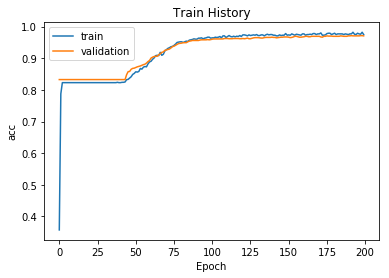

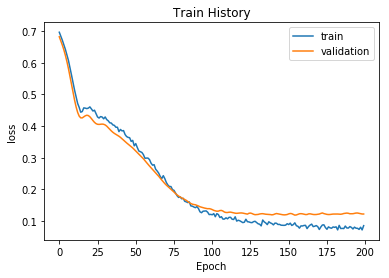

600/600 [==============================] - 0s 36us/step


accuracy= 0.9816666666666667


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

import matplotlib.pyplot as plt 
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

    
model = Sequential()

model.add(Dense(units=200, 
                input_dim=29, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.6)) 
model.add(Dense(units=200,  
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,
                kernel_initializer='uniform',
                activation='sigmoid'))

print(model.summary()) 



model.compile(loss='binary_crossentropy',   
              optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=train_feature_trans, y=train_label,
                          validation_split=0.6, epochs=200, 
                          batch_size=1000, verbose=2) # using verbose for producing detailed logging information.




show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')




scores = model.evaluate(test_feature_trans, test_label)
print('\n')
print('accuracy=',scores[1])

prediction = model.predict_classes(test_feature_trans)


#After the 200 Epochs the Graph will plot.

# Why 200 Epochs?
#### The reason why I am using 200 Epochs is, that 15 Epochs won't be enough for this specific sparesly amount of data to even train the model in a proper way.

In [0]:
df_ans = pd.DataFrame({'Real Class' :test_label})
df_ans['Prediction'] = prediction

-------------------------------------------------

## Check out test results (and see if the predictions are all 0 or not)

In [0]:
df_ans[ df_ans['Real Class'] != df_ans['Prediction'] ]

,Real Class,Prediction
110,1.0,0
163,0.0,1
224,1.0,0
283,0.0,1
308,1.0,0
345,1.0,0
357,1.0,0
378,1.0,0
484,0.0,1
494,1.0,0


## Compare Prediciton of Train model with Real Class Values:

In [0]:
df_ans['Prediction'].value_counts()

0    522
1     78
Name: Prediction, dtype: int64

In [0]:
df_ans['Real Class'].value_counts()

0.0    519
1.0     81
Name: Real Class, dtype: int64

-------------------------------------

# Batch size normally impacts learning significant. 
What happens when you put a batch through your network is that you average the gradients. The concept is that if your batch size is big enough, this will provide a stable enough estimate of what the gradient of the full dataset would be. The lower I go, the less accurate my esttimate will be, however in some cases these noisy gradients can actually help escape local minima.

When it is too low, your network weights can just jump around if your data is noisy and it might be unable to learn or it converges very slowly, thus negatively impacting total computation time. --> this was infact my result, so I scaled the batch_size to 1000.

#### Nevertheless first, the results were still confusing me, even after the second model. I will explain it in my conclusion, why I think that my ML-Models are right.


# Conclusion

The Total Number of the Data is about
#### 285,000 | Fraud data: 492 
In this dataset case, the data was already very clean and cateogrized. Further I think the small amount of data is why my training results are that high.
#### No matter if:
#### ML Model 1 (GaussianNB) or ML Model 2 (Keras) was used to train.
After I figured out the 15 Epochs won’t be enough to even train my model I increased the Epochs to 200 (low amount of data = low time of computing the data within the epochs) to reach obviously learning results of the ML Model 2, as displayed in the graphs. 


Also, the confusion matrix of ML Model 1 explained quite good why it works that well in precision. 


--------------------------------------------------------------------